<a href="https://colab.research.google.com/github/MU2324/AI/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# BFS
from collections import deque
def bfs(graph, start, destination):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        current, path = queue.popleft()
        if current == destination:
            print("Path found:", ' -> '.join(path))
            return
        visited.add(current)
        for neighbor in graph[current]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                visited.add(neighbor)
india_city_graph = {
    'Delhi': ['Mumbai', 'Jaipur', 'Lucknow'],
    'Mumbai': ['Delhi', 'Chennai', 'Bangalore'],
    'Chennai': ['Mumbai', 'Bangalore'],
    'Bangalore': ['Mumbai', 'Chennai', 'Hyderabad'],
    'Hyderabad': ['Bangalore', 'Chennai'],
    'Jaipur': ['Delhi', 'Lucknow'],
    'Lucknow': ['Delhi', 'Jaipur']
}
start_city = input("Enter the start city in India: ")
destination_city = input("Enter the destination city in India: ")
print(f"Searching for a path from {start_city} to {destination_city}")
bfs(india_city_graph, start_city, destination_city)


Enter the start city in India: Delhi
Enter the destination city in India: Hyderabad
Searching for a path from Delhi to Hyderabad
Path found: Delhi -> Mumbai -> Bangalore -> Hyderabad


In [38]:
# DFS

def dfs(graph, current, destination, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []
    path = path + [current]
    visited.add(current)
    if current == destination:
        print("Path found:", ' -> '.join(path))
        return
    for neighbor in graph[current]:
        if neighbor not in visited:
            dfs(graph, neighbor, destination, visited, path)
india_city_graph = {
    'Delhi': ['Mumbai', 'Jaipur', 'Lucknow'],
    'Mumbai': ['Delhi', 'Chennai', 'Bangalore'],
    'Chennai': ['Mumbai', 'Bangalore'],
    'Bangalore': ['Mumbai', 'Chennai', 'Hyderabad'],
    'Hyderabad': ['Bangalore', 'Chennai'],
    'Jaipur': ['Delhi', 'Lucknow'],
    'Lucknow': ['Delhi', 'Jaipur']
}
start_city = input("Enter the start city in India: ")
destination_city = input("Enter the destination city in India: ")
print(f"Searching for a path from {start_city} to {destination_city}")
dfs(india_city_graph, start_city, destination_city)


Enter the start city in India: Jaipur
Enter the destination city in India: Delhi
Searching for a path from Jaipur to Delhi
Path found: Jaipur -> Delhi


In [5]:
# A* ALGORITHM

import heapq
# Define the graph of cities and their distances
graph = {
    'Mumbai': {'Pune': 150, 'Nashik': 170},
    'Pune': {'Mumbai': 150,  'Sambhajinagar': 260},
    'Nashik': {'Mumbai': 170, 'Sambhajinagar': 180},
    'Sambhajinagar': {'Pune': 260, 'Nashik': 180}
}
# Heuristic function to estimate distance between two cities
heuristic = {
    'Mumbai': 0,
    'Pune': 120,
    'Nashik': 200,
    'Sambhajinagar': 300
}
def astar(start, goal):
    # Create a priority queue to store the nodes to be explored
    open_list = [(0, start)]

    # Create a set to store the visited nodes
    closed_list = set()

    # Create a dictionary to store the actual distance from start to each node
    g = {city: float('inf') for city in graph}
    g[start] = 0

    # Create a dictionary to store the estimated total distance from start to goal via each node
    f = {city: float('inf') for city in graph}
    f[start] = heuristic[start]

    # Create a dictionary to store the path taken to reach each node
    path = {start: []}
    while open_list:
        # Get the node with the lowest total estimated distance
        current_distance, current_city = heapq.heappop(open_list)

        # Check if the goal is reached
        if current_city == goal:
            return g[current_city], path[current_city]

        # Add the current city to the closed list
        closed_list.add(current_city)

        # Explore the neighbors of the current city
        for neighbor, distance in graph[current_city].items():
            # Calculate the actual distance from start to the neighbor
            temp_g = g[current_city] + distance

            # Check if the neighbor has not been visited or a shorter path is found
            if neighbor not in closed_list and temp_g < g[neighbor]:
                # Update the actual distance
                g[neighbor] = temp_g
                # Update the estimated total distance
                f[neighbor] = temp_g + heuristic[neighbor]
                # Add the neighbor to the open list
                heapq.heappush(open_list, (f[neighbor], neighbor))
                # Update the path taken to reach the neighbor
                path[neighbor] = path[current_city] + [(current_city, neighbor)]
    # No path found
    return None, None

# Print available cities
print("Available cities:")
for city in graph.keys():
    print(city)
# Take user input for start and goal cities
start_city = input("Enter the start city: ")
goal_city = input("Enter the goal city: ")

# Find the shortest path between the user-provided cities
shortest_distance, shortest_path = astar(start_city, goal_city)

if shortest_distance is not None:
    print(f"The shortest distance between {start_city} and {goal_city} is {shortest_distance} km.")
    print("The path is:")
    for city1, city2 in shortest_path:
        print(f"{city1} -> {city2}")
else:
    print(f"No path found between {start_city} and {goal_city}.")



Available cities:
Mumbai
Pune
Nashik
Sambhajinagar
Enter the start city: Mumbai
Enter the goal city: Pune
The shortest distance between Mumbai and Pune is 150 km.
The path is:
Mumbai -> Pune


Accuracy is  1.0


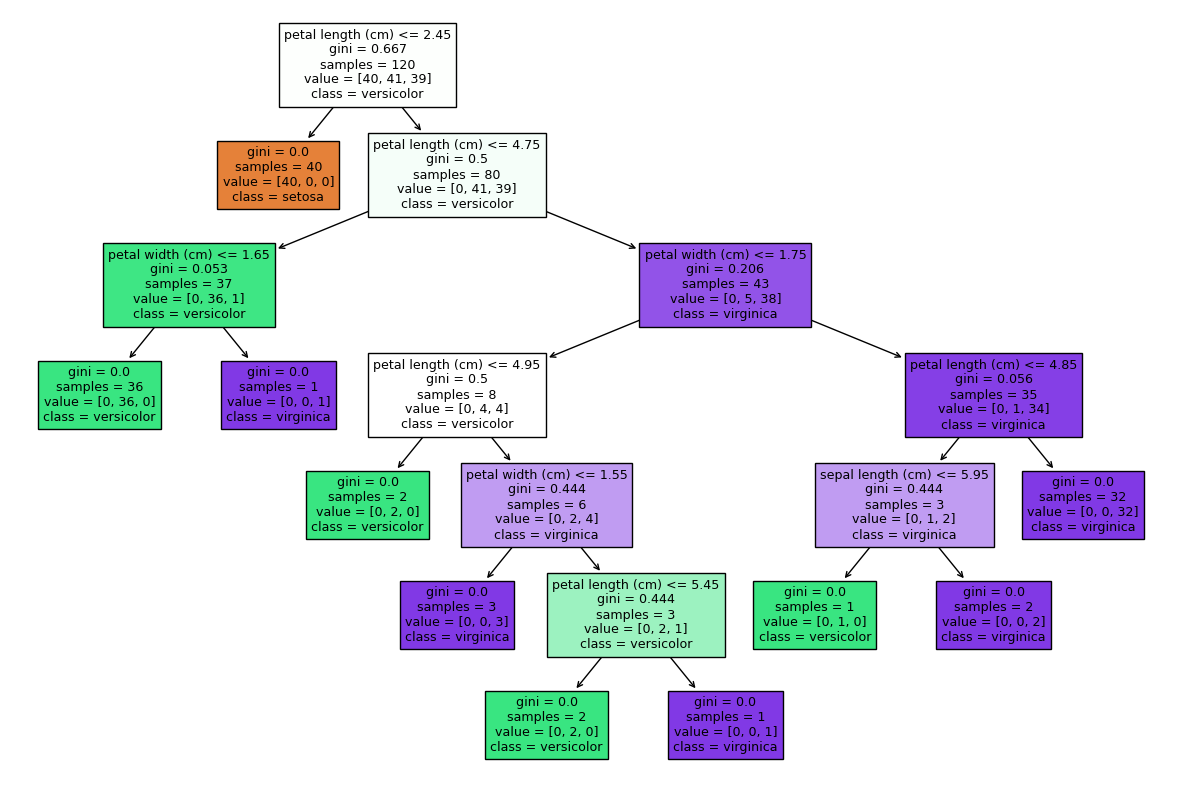

In [40]:
#Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

clf = DecisionTreeClassifier()
model = clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy is ",accuracy)

fig = plt.figure(figsize=(15,10))
image = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=class_names, filled=True)
plt.show()

In [41]:
#SVM

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset from a local file (e.g., CSV)
# Replace 'your_dataset.csv' with the actual path to your dataset file
iris = load_iris()
X = iris.data
y = iris.target
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels here

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [42]:
#KNN

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)
print('accuracy ',accuracy)

accuracy  1.0


In [44]:
# FEED FORWARD BACK PRAPOGATION

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)

X_train , X_test , y_train , y_test = train_test_split(X , y_binary , test_size = 0.2)

model = tf.keras.Sequential([tf.keras.layers.Dense(8,input_dim = X_train.shape[1],activation = 'relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer = 'adam' , loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train , y_train , epochs=50 , batch_size=32 , validation_split=0.2 , verbose = 0)

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test , y_pred_classes)
print('accuracy is ',accuracy)

1/1 [==============================] - 0s 77ms/step
accuracy is  1.0


In [46]:
# NAIVE BAYES

# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

print(X)
print(y)

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)




[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [35]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1234)

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy of individual tree ',accuracy)

boost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3) , n_estimators=50 , random_state=1234)
boost_clf.fit(X_train , y_train)

y_adaboost_pred = boost_clf.predict(X_test)

accuracy = accuracy_score(y_test , y_adaboost_pred)
print('Accuracy after boosting ',accuracy)

Accuracy of individual tree  0.5666666666666667
Accuracy after boosting  1.0
